In [1]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:


data = pd.read_csv('ml_data_variable.csv')

# extract the independent variables (X) and dependent variable (y)
X = data[['COAL, Thousand Short Tons', 'NATURALGAS, Billion Cubic Feet', 'ELECTRICITY, Million Kilowatthours',
         'PETRO_INDUSTRIAL, Thousand Barrels per Day', 'PETRO_RESIDENTIAL_COMMERCIAL, Thousand Barrels per Day',
         'PETRO_TRANSPORTATION_ELECTRICPOWER, Thousand Barrels per Day']]
y = data['CO2, Million Metric Tons']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)





R² Score: 0.9513068077711544
Mean Absolute Error: 8.067513444444206
Mean Squared Error: 102.8121630249503
Root Mean Squared Error: 10.13963327862257


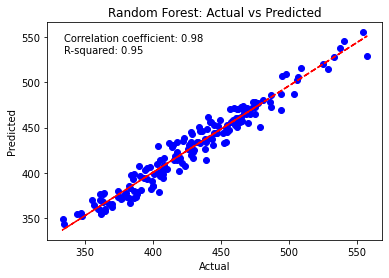

In [3]:


# Create and train the Random Forest model
#rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

#rf_classifier.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print results

print("R² Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Calculate statistical parameters
correlation = np.corrcoef(y_test, y_pred)[0, 1]
r_squared = np.square(correlation)

# Fit a linear regression line
trendline = np.polyfit(y_test, y_pred, 1)
trendline_fn = np.poly1d(trendline)

# Plot Actual vs Predicted values with trend line
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, trendline_fn(y_test), color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')

# Annotate statistical parameters on the plot
textstr = f'Correlation coefficient: {correlation:.2f}\nR-squared: {r_squared:.2f}'
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, verticalalignment='top')

plt.show()